In [2]:
%config IPCompleter.greedy=True

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Final Introduction to AI course : COVID-19 Analysis and Predictions

## Introduction: Dataset

Authors of the dataset: 
Xu, Bo and Gutierrez, Bernardo and Mekaru, Sumiko and Sewalk, Kara and Goodwin, Lauren and Loskill, Alyssa and  Cohn, Emily and Hswen, Yulin and Hill, Sarah C. and Cobo, Maria M and Zarebski, Alexander and Li, Sabrina and Wu, Chieh-Hsi   and Hulland, Erin and Morgan, Julia and Wang, Lin and O'Brien, Katelynn and Scarpino, Samuel V. and Brownstein, John S. and Pybus, Oliver G. and Pigott, David M. and Kraemer, Moritz U. G.

Article about the dataset: [Epidemiological data from the COVID-19 outbreak, real-time case information}](https://www.doi.org/10.1038/s41597-020-0448-0)

Github : https://github.com/beoutbreakprepared/nCoV2019

In [94]:
url = ('https://raw.githubusercontent.com/beoutbreakprepared/nCoV2019/master/outside_hubei_20200301.csv')

df = pd.read_csv(url)
df.head()

,id,age,sex,city,province,country,not_wuhan,latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN


In [95]:
df.describe(include="all")

,id,age,sex,city,province,country,not_wuhan,latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
count,13174.000000,1363,1277,10379,13118,13352,13375.0,13141.000000,13141.000000,13141,...,184,93,187,1018,1160,9072,12872,13075,13099,17
unique,NaN,116,4,851,162,52,NaN,NaN,NaN,7,...,12,38,47,182,280,303,148,46,659,1
top,NaN,50-59,male,Wenzhou City,Guangdong,China,NaN,NaN,NaN,admin2,...,stable,26.02.2020,Could be some cases from 23rd,Yokohama Port,Wanzhou District,Wenzhou City,Guangdong,China,19,SL
freq,NaN,47,712,448,1228,10562,NaN,NaN,NaN,7960,...,78,8,91,479,65,448,1228,10447,578,17
mean,6769.124412,NaN,NaN,NaN,NaN,NaN,1.0,31.986606,110.540471,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,3920.763877,NaN,NaN,NaN,NaN,NaN,0.0,7.521723,27.913790,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.0,-37.813600,-124.953070,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3351.250000,NaN,NaN,NaN,NaN,NaN,1.0,27.905380,111.729600,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,6864.500000,NaN,NaN,NaN,NaN,NaN,1.0,31.759410,115.441800,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10179.750000,NaN,NaN,NaN,NaN,NaN,1.0,35.781340,120.440400,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 0. Cleaning Dataset


## Age Range to average age conversion

Some of the ages are actually an age range. The goal here if to convert some age ranges to an average age.

_ex: 10-20 => 15_

In [156]:
df = df[df["age"] != "7 months"]

tmp = []

for index,value in enumerate(df["age"]): 
    try:
        if (type(value) == str):
            # some age values may be a range like : "12-20"
            age_array = value.split("-")
            if len(age_array) == 2:
                tmp.append((float(age_array[0]) + float(age_array[1])) // 2)
            else: 
                tmp.append(float(value))
        else:
            tmp.append(float(value))
    except Exception:
        tmp.append(np.NaN)
        continue

ages_transformed = pd.Series(tmp)

In [154]:
df["age"] = ages_transformed

In [157]:
df[df["id"] == 12556.0]


,id,age,sex,city,province,country,not_wuhan,latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
12250,12556.0,64.0,male,Biei Town,Hokkaido,Japan,1.0,43.54328,142.335868,point,...,NaN,NaN,NaN,Biei Town,NaN,NaN,Hokkaido,Japan,12,NaN


## 1. Analysis of the Dataset

Number of deaths per age

In [84]:
tmp.dropna()

0              30
1              47
2              49
3              47
4              50
6              42
8              59
9              30
11             39
13             38
14             45
17             33
20             37
21             39
22             32
23             45
24             45
25             18
26             56
27             42
28             33
37             44
38             65
39             21
40             41
55             44
78             30
79             70
80             43
82             31
           ...   
13156       80-89
13157        0-10
13158       80-89
13159       60-69
13160       60-69
13161       60-69
13162       60-69
13163       40-49
13164       70-79
13165       60-69
13166       60-69
13167       60-69
13168       50-59
13169       60-69
13170       40-49
13171        0-10
13174          27
13175       60-69
13176          42
13177          51
13178          61
13179          38
13180          57
13181          36
13182     

0        NaN
1         47
2         49
3         47
4         50
5        NaN
6         42
7        NaN
8         59
9         30
10       NaN
11        39
12       NaN
13        38
14        45
15       NaN
16       NaN
17        33
18       NaN
19       NaN
20        37
21        39
22        32
23        45
24        45
25        18
26        56
27        42
28        33
29       NaN
        ... 
13348    NaN
13349    NaN
13350    NaN
13351    NaN
13352    NaN
13353    NaN
13354    NaN
13355    NaN
13356    NaN
13357    NaN
13358    NaN
13359    NaN
13360    NaN
13361    NaN
13362    NaN
13363    NaN
13364    NaN
13365    NaN
13366    NaN
13367    NaN
13368    NaN
13369    NaN
13370    NaN
13371    NaN
13372    NaN
13373    NaN
13374    NaN
13375    NaN
13376    NaN
13377    NaN
Name: age, Length: 13378, dtype: object

In [ ]:
df = df.fillna(df.mean())

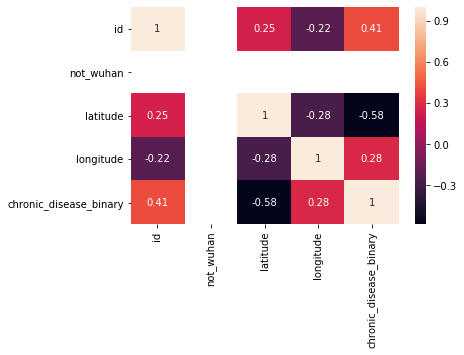

In [6]:
import seaborn as sn

corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

## 2. Bayes Nets 

,id,age,sex,city,province,country,not_wuhan,latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN
5,6.0,NaN,NaN,Lu'an City,Anhui,China,1.0,31.759410,116.315100,admin2,...,NaN,NaN,NaN,NaN,NaN,Lu'an City,Anhui,China,341500,NaN
6,7.0,42,female,Fuyang City,Anhui,China,1.0,32.918800,115.703600,admin2,...,NaN,NaN,NaN,NaN,NaN,Fuyang City,Anhui,China,341200,NaN
7,8.0,NaN,female,Huaibei City,Anhui,China,1.0,33.727220,116.742400,admin2,...,NaN,NaN,NaN,NaN,NaN,Huaibei City,Anhui,China,340600,NaN
8,9.0,59,female,Huainan City,Anhui,China,1.0,32.757380,116.734000,admin2,...,NaN,NaN,NaN,NaN,NaN,Huainan City,Anhui,China,340400,NaN
9,10.0,30,male,Hefei City,Anhui,China,1.0,31.794440,117.342800,admin2,...,NaN,NaN,NaN,NaN,NaN,Hefei City,Anhui,China,340100,NaN


## 3. Machine Learning

## 4. Improving the results and Theoretical formalism